In [1]:
pip install pandas matplotlib nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
data=pd.read_csv('Movie_Review.csv')

In [3]:
data

text sentiment
0    My daughter liked it but I was aghast, that a ...       neg
1    I... No words. No words can describe this. I w...       neg
2    this film is basically a poor take on the old ...       neg
3    This is a terrible movie, and I'm not even sur...       neg
4    First of all this movie is a piece of reality ...       pos
..                                                 ...       ...
995  "Campfire Tales" is basically made up of three...       pos
996  I just saw this film at the phoenix film festi...       pos
997  It's out of question that the real Anna Anders...       pos
998  Michelle Pfeiffer stars as a mob widow who see...       pos
999  This film tells the stories of several couples...       pos

[1000 rows x 2 columns]

In [7]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data

text sentiment
0    My daughter liked it but I was aghast, that a ...       neg
1    I... No words. No words can describe this. I w...       neg
2    this film is basically a poor take on the old ...       neg
3    This is a terrible movie, and I'm not even sur...       neg
4    First of all this movie is a piece of reality ...       pos
..                                                 ...       ...
995  "Campfire Tales" is basically made up of three...       pos
996  I just saw this film at the phoenix film festi...       pos
997  It's out of question that the real Anna Anders...       pos
998  Michelle Pfeiffer stars as a mob widow who see...       pos
999  This film tells the stories of several couples...       pos

[1000 rows x 2 columns]

In [4]:
def clean_review(review):
    str= ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
data['review']=data['text'].apply(clean_review)

In [7]:
#wordcloud
from wordcloud import WordCloud

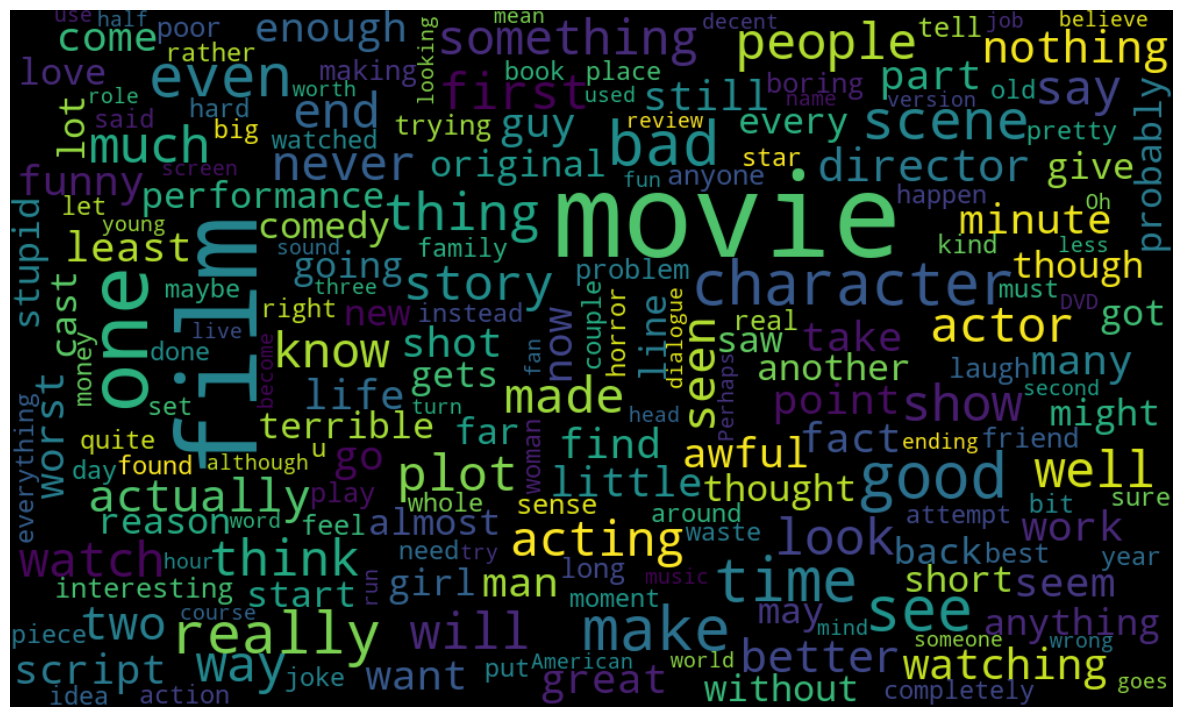

In [8]:
#draw wordcloud
reviews= ' '.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)                 
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show() 

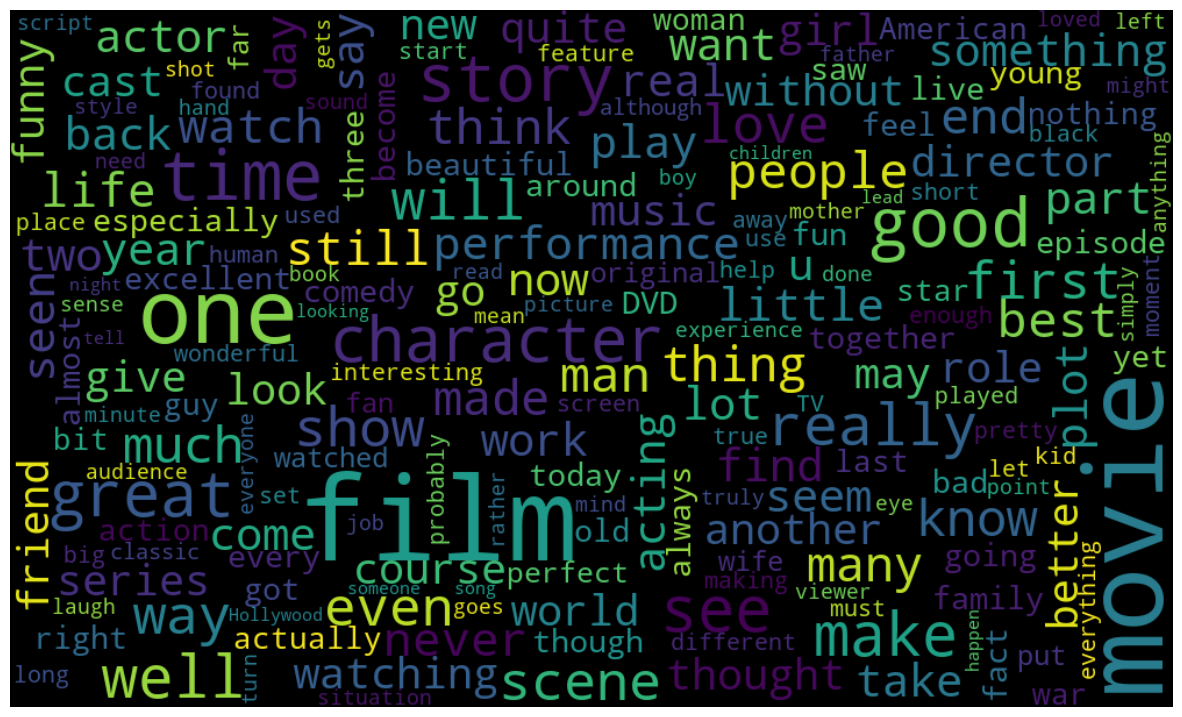

In [9]:
reviews= ' '.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)                 
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show() 

In [13]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.7 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.7 MB 8.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 9.1 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.4 MB 13.1 MB/s eta 0:00:03
   ---- ----------------------------------- 3.9/38.4 MB 9.8 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.4 MB 8.4 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/38.4 MB 7.4 MB/s eta 0:00:05
   --------- ------------------------------ 8.7/38.4 MB 8.3 MB/s eta 0:00:04
   --------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [16]:
reviews=cv.fit_transform(data['text']).toarray()

In [17]:
data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\sinch\AppData\Local\Temp\ipykernel_15084\1439909789.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])


In [18]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
reviews_train, reviews_test, sent_train, sent_test= train_test_split(reviews, data['sentiment'],test_size=0.2)

In [23]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [25]:
predict=model.predict(reviews_test)

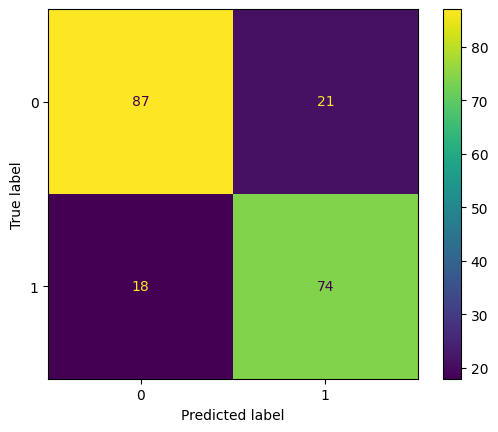

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()                                

In [28]:
import pickle as pk

In [30]:
pk.dump(model,open('model.pkl','wb'))

In [31]:
pk.dump(cv,open('scaler.pkl','wb'))